Import data

In [1]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
cd drive/MyDrive/MLLD_MPA/data/

/content/drive/MyDrive/MLLD_MPA/data


In [5]:
!unzip song_small.zip

Archive:  song_small.zip
replace song_small.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Import necessary libraries

In [7]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import copy
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import r2_score, roc_auc_score

**Read and preprocess data**

In [68]:
df = pd.read_csv('song_small.csv')

In [69]:
numeric_columns=['artist_familiarity',
 'artist_hotttnesss',
 'duration',
 'end_of_fade_in',
 'energy',
 'mode',
 'key',
 'key_confidence',
 'loudness',
 'song_hotttnesss',
 'tempo',
 'time_signature',
 'time_signature_confidence',
 'year']

df1 = df[numeric_columns]

df1.astype('float')
display(df1.dtypes)

artist_familiarity           float64
artist_hotttnesss            float64
duration                     float64
end_of_fade_in               float64
energy                       float64
mode                         float64
key                          float64
key_confidence               float64
loudness                     float64
song_hotttnesss              float64
tempo                        float64
time_signature                 int64
time_signature_confidence    float64
year                           int64
dtype: object

**MODEL 1**

Split data for train and test

In [71]:
train = df1.dropna(axis=0, how='any')
train2 = train.copy()

Y = copy.deepcopy(train.song_hotttnesss)

train = train.drop("song_hotttnesss", axis=1)
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.33, random_state=7)

Train/ test

In [72]:
model = XGBRegressor()
model.fit(X_train, y_train)

[20:54:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [73]:
# # make predictions for test data
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.99%


Best features using XGD

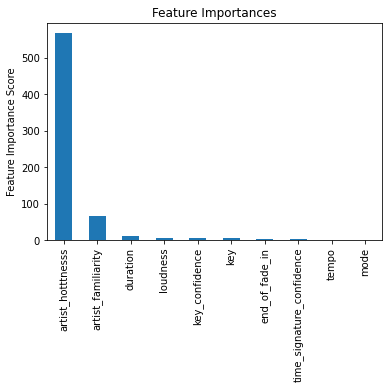

In [81]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.savefig('Important_features_feats')
plt.show()



**MODEL 2**

In [77]:
target = copy.deepcopy(train2.song_hotttnesss)

input = train2.drop("song_hotttnesss", axis = 1)
X = input.drop("artist_hotttnesss", axis = 1)


In [78]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, target, test_size=0.33, random_state=7)

In [79]:
model2 = XGBRegressor()
model2.fit(X_train2, y_train2)

# # make predictions for test data
y_pred2 = model2.predict(X_test2)
accuracy2 = model2.score(X_test2, y_test2)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

[20:59:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 68.83%


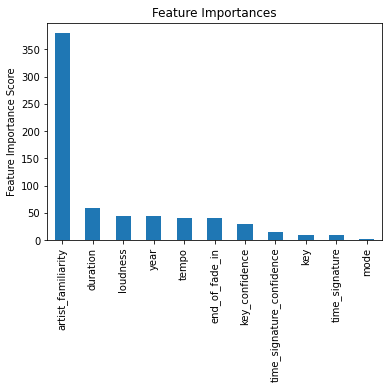

In [82]:
feat_imp2 = pd.Series(model2.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp2.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.savefig('Important_feats_excluding_arthot')
plt.show()